<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/_ml_classification_metrics_cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# !gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
!wget https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V -O spam_ham_dataset.csv

--2024-02-06 03:42:43--  https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V [following]
--2024-02-06 03:42:43--  https://drive.usercontent.google.com/download?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5502589 (5.2M) [application/octet-stream]
Saving to: ‘spam_ham_dataset.csv’

spam_ham_dataset.cs 100%[===================>]   5.25M  31.4MB/s    in 0.2s    

2024-02-06 03:42:45 (31.4 MB/s) - ‘spam_

In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# !gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

!wget https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt -O Spam_finalData.csv

--2024-02-06 03:42:45--  https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt [following]
--2024-02-06 03:42:45--  https://drive.usercontent.google.com/download?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1644690 (1.6M) [application/octet-stream]
Saving to: ‘Spam_finalData.csv’

Spam_finalData.csv  100%[===================>]   1.57M  --.-KB/s    in 0.1s    

2024-02-06 03:42:47 (12.0 MB/s) - ‘Spam_fi

In [ ]:
dt = pd.read_csv('Spam_finalData.csv')
print(dt.shape)
dt.head()

(5171, 16)


,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

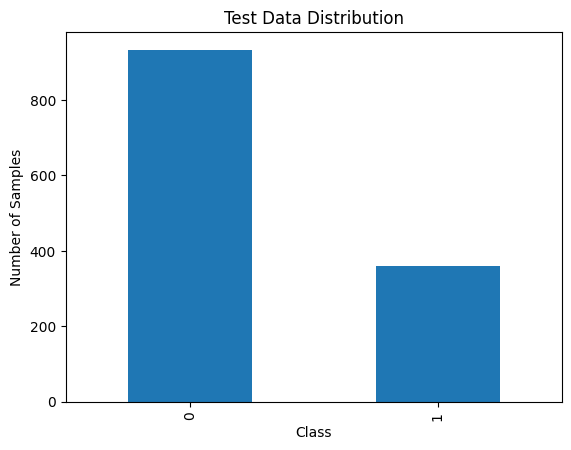

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print('Model Accuracy:',model.score(X_test,y_test))


Model Accuracy: 0.9396751740139211


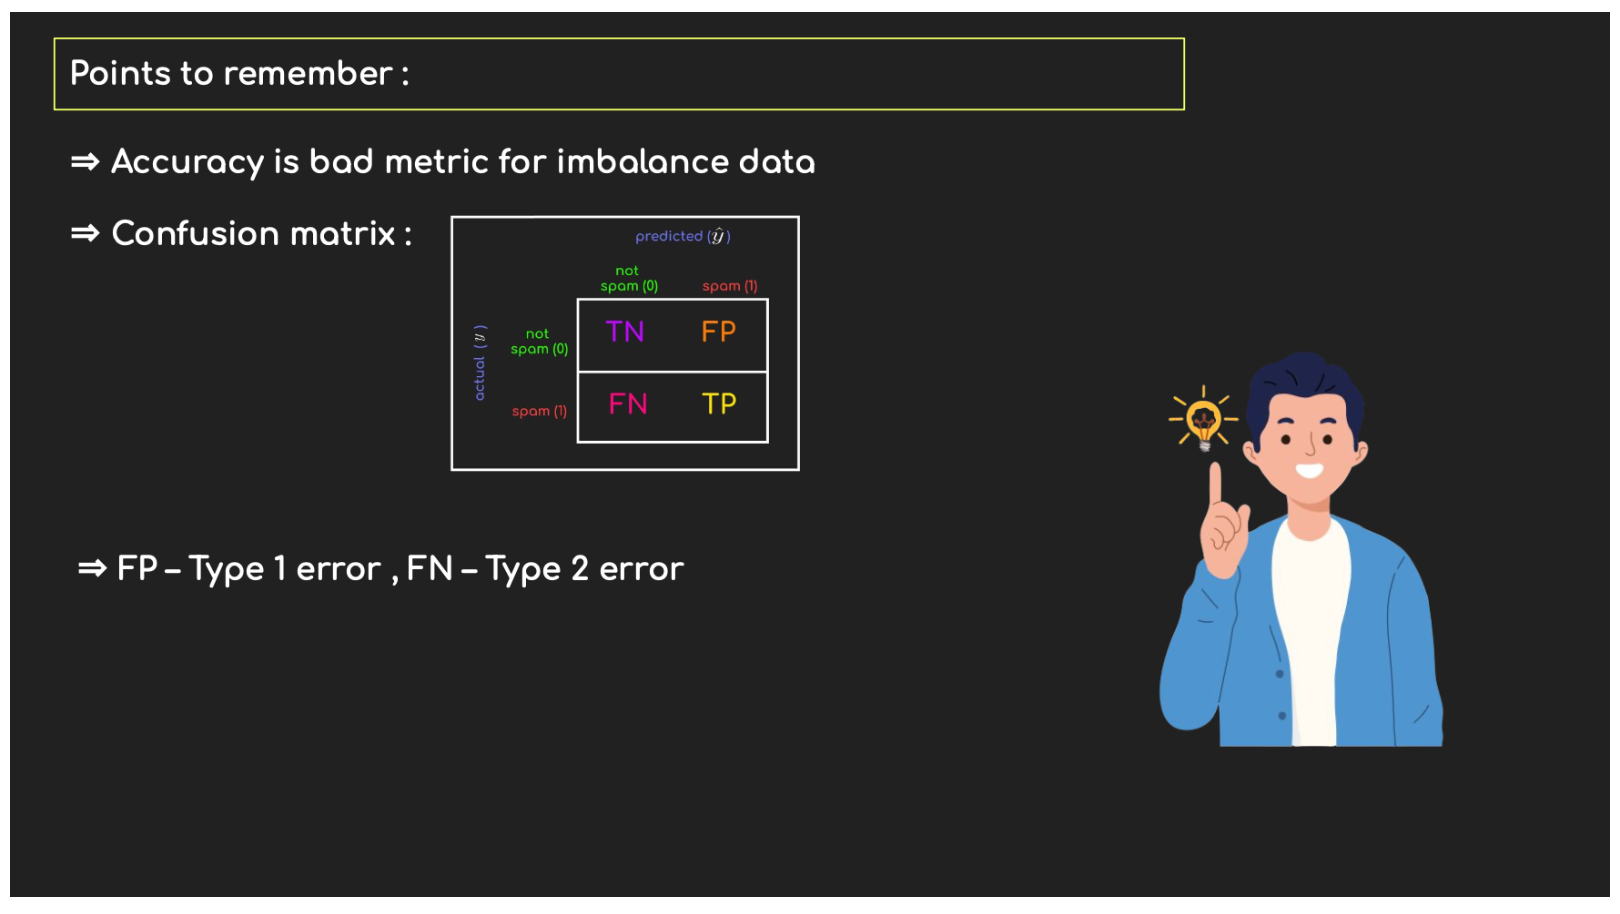

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[870,  63],
       [ 15, 345]])

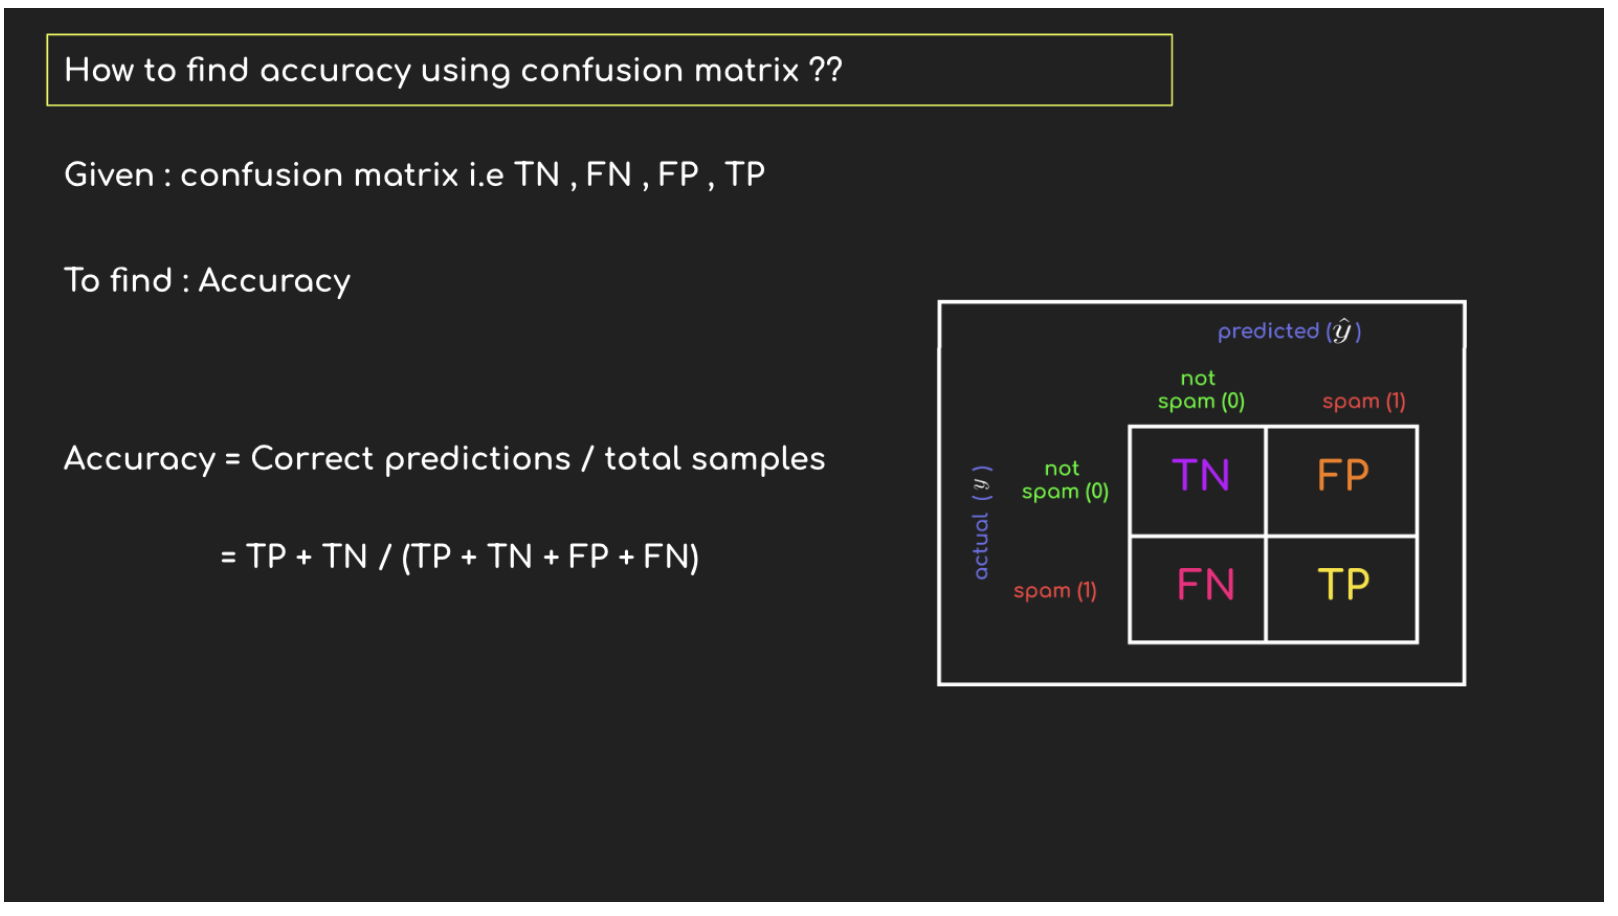

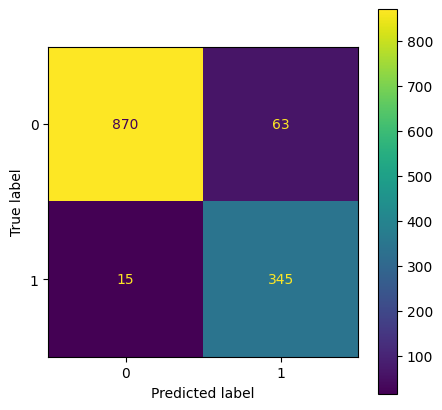

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()


0.9396751740139211

In [ ]:
def precision_calc(conf):
    tp = conf[1,1]
    fp = conf[0,1]

    return tp/(tp+fp)
precision_calc(conf_matrix)

0.8455882352941176

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8455882352941176

In [ ]:
def recall_calc(conf):
    tp = conf[1,1]
    fn = conf[1,0]

    return tp/(tp+fn)
recall_calc(conf_matrix)


0.9583333333333334

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9583333333333334

In [ ]:
pre = precision_calc(conf_matrix)
re = recall_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')


f1Score:0.8984370019534011


In [ ]:
from sklearn.metrics import f1_score
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8984375


In [ ]:
# The difference in scratch implementation and Sklearn f1score:

# Because Sklearn uses a different value to counter zero division